In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler,EarlyStopping
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def preprocess(df):
    data = df.values
    X = data[:,0:10]
    y = data[:,10]
    #we have to scale the features to a common range
    #we are using min-max scaler instead of standardscaler because min-max scaler preserves the distribution of the data
    #Add the formula for min-max scaler in the report
    X = preprocessing.MinMaxScaler().fit_transform(X)
    return X,y

In [14]:
def split(X,y):
    X_train, temp_x, y_train, temp_y = train_test_split(X, y, test_size=0.3)
    X_val, X_test, y_val, y_test = train_test_split(temp_x, temp_y, test_size=0.5)
    return X_train,X_val,X_test,y_train,y_val,y_test

In [50]:
#Two hidden layer model
#n1 = number of neurons in first hidden layer
#n2 = number of neurons in seconf hidden layer
def nnetwork(n1,n2):
    model = Sequential()
    model.add(Dense(n1,activation = 'relu',input_shape = (10,))) #The weight matrix is initialised using the default initializer 'glorot_uniform'
    model.add(Dense(n2,activation = 'relu'))
    model.add(Dense(1,activation = 'sigmoid'))
    # model.summary()
    return model    

In [54]:
#This is for learning rate scheduler.
#decay_rate is hyperparameter that we need to optimize
#we can use different typer decays:
# time based decay: lr = lr/(1 + decay_rate*epoch)
# step decay: lr = lr0*drop^(floor(epoch/epoch_drop))
#The following is exponential decay:
def schedule(epoch,lr,decay_rate = 0.001):
    if(epoch < 10):
        return lr
    # lr_new = lr*np.exp(-decay_rate*epoch)
    lr_new = lr*np.exp(-decay_rate)
    return lr_new

In [55]:
def train(model,X_train,y_train,X_val,y_val,num_epochs = 500,batch_size = 32,lr_initial = 0.001,momentum = 0.5,patience_value = 7):
    tf.keras.backend.clear_session()
    callbacks = [EarlyStopping(monitor='val_acc', patience=patience_value),LearningRateScheduler(schedule)]
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=lr_initial,momentum= momentum),metrics=['acc'])
    model_history=model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, validation_data=(X_val, y_val),
                        callbacks=callbacks)
    return model,model_history

In [11]:
df = pd.read_csv('housepricedata.csv')

In [12]:
X,y = preprocess(df)

In [15]:
X_train,X_val,X_test,y_train,y_val,y_test = split(X,y)

In [17]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [57]:
#Always run the following two line together
model = nnetwork(32,32) 
model,model_hist = train(model,X_train,y_train,X_val,y_val,num_epochs = 500,batch_size = 32,lr_initial = 0.001,momentum = 0.8,patience_value = 25)

Epoch 1/500
32/32 [==============================] - 1s 10ms/step - loss: 0.6850 - acc: 0.6703 - val_loss: 0.6790 - val_acc: 0.7123 - lr: 0.0010
Epoch 2/500
32/32 [==============================] - ETA: 0s - loss: 0.6831 - acc: 0.638 - 0s 6ms/step - loss: 0.6824 - acc: 0.6487 - val_loss: 0.6753 - val_acc: 0.7123 - lr: 0.0010
Epoch 3/500
32/32 [==============================] - 0s 6ms/step - loss: 0.6797 - acc: 0.6517 - val_loss: 0.6718 - val_acc: 0.7169 - lr: 0.0010
Epoch 4/500
32/32 [==============================] - 0s 6ms/step - loss: 0.6769 - acc: 0.6614 - val_loss: 0.6680 - val_acc: 0.7123 - lr: 0.0010
Epoch 5/500
32/32 [==============================] - 0s 6ms/step - loss: 0.6742 - acc: 0.6399 - val_loss: 0.6645 - val_acc: 0.7306 - lr: 0.0010
Epoch 6/500
32/32 [==============================] - 0s 6ms/step - loss: 0.6713 - acc: 0.6663 - val_loss: 0.6612 - val_acc: 0.7580 - lr: 0.0010
Epoch 7/500
32/32 [==============================] - 0s 6ms/step - loss: 0.6685 - acc: 0.6898 - v

In [58]:
model.evaluate(X_test, y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.4213 - acc: 0.8539


0.853881299495697

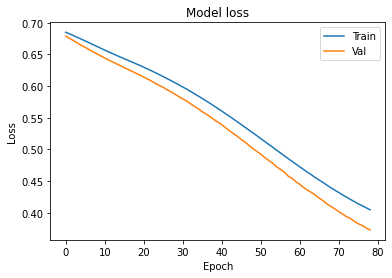

In [59]:
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

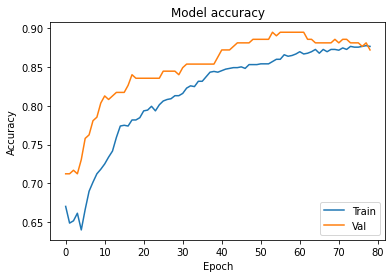

In [60]:
plt.plot(model_hist.history['acc'])
plt.plot(model_hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()